# 데이터 로드

In [1]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

# 데이터 로드

In [35]:
# 엑셀 로우데이터를 유니코드 텍스트로 저장(utf-16)
total_data = pd.read_table('cosmetic_review'.txt', encoding='utf-16')

In [36]:
total_data[:5]

,document,label
0,검은 피부엔 맞지 않네요... 뽀오얀 피부엔 괜찮아요... 색상 쪼금 어두워요,0
1,봄 신상 색상 너무 저렴하게 나와서 모두 구매했는데 다 이쁨,1
2,싸게 샀는데 ...색은 그렇다 치고 잘 번져요 엄청 건조하고 싼맛 그냥 색 느낌만 ...,0
3,배송 3일이나 걸렸지만 저렴하게 구매해서 기분이 좋네요,0
4,페리페라 입소문 듣고 사용해본 적은 없는데 가격 저렴하게 샀어요 처음 사용해보는 ...,1


In [12]:
# # 칼럼 정리(미사용 칼럼 삭제 & 칼럼명 변경)
# total_data.drop(['aspect term', 'aspect category'], axis='columns', inplace=True)
# total_data.rename(columns = {'review':'document', 'polarity':'label'}, inplace=True)
# total_data[:5]

,review,polarity
0,검은 피부엔 맞지 않네요... 뽀오얀 피부엔 괜찮아요... 색상 쪼금 어두워요,negative
1,봄 신상 색상 너무 저렴하게 나와서 모두 구매했는데 다 이쁨,positive
2,싸게 샀는데 ...색은 그렇다 치고 잘 번져요 엄청 건조하고 싼맛 그냥 색 느낌만 ...,negative
3,배송 3일이나 걸렸지만 저렴하게 구매해서 기분이 좋네요,negative
4,페리페라 입소문 듣고 사용해본 적은 없는데 가격 저렴하게 샀어요 처음 사용해보는 ...,positive


In [19]:
 # shuffling
total_data = total_data.sample(frac=1).reset_index(drop=True) 
total_data[:5]

,document,label
0,NaN,NaN
1,넘나이뻐요 ㅠㅠㅠ 색상 진짜 실패한 적이 음습 근데 삐아 2버전이 1버전보다 지속력...,1.0
2,기승전핑크도 아니네 오 바른 순간 바로 분홍색 됩니다ㅜㅜ 입술색 최대한 죽이고 발...,0.0
3,색 예뻐요 각질부각 좀 있네요ㅠ,0.0
4,생각보다 색상 이쁘지 않아요,0.0


# 데이터 클렌징

In [20]:
# 중복 데이터 체크
total_data['document'].nunique(), total_data['label'].nunique()

(9700, 2)

In [21]:
# 중복 데이터 제거
total_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [22]:
# 중복 샘플 제거 확인
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 9701


In [23]:
# NULL값 유무 체크
print(total_data.isnull().values.any())

True


In [24]:
# 어느 열에 null값이 존재하는지 확인
print(total_data.isnull().sum())

document    1
label       1
dtype: int64


In [25]:
# null값 데이터가 어느 인덱스 위치에 존재하는지 출력
total_data.loc[total_data.document.isnull()]

,document,label
0,NaN,NaN


In [26]:
# Null 값 제거
total_data = total_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(total_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [27]:
# null데이터 제거된 샘플 개수 확인
print(len(total_data))

9700


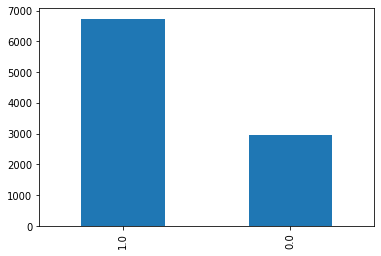

In [28]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')

In [29]:
# 정확하게 개수를 체크
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0    0.0   2969
1    1.0   6731


# 데이터 정규화

In [30]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
total_data['document'] = total_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data[:5]

,document,label
1,넘나이뻐요 ㅠㅠㅠ 색상 진짜 실패한 적이 음습 근데 삐아 버전이 버전보다 지속력이 ...,1.0
2,기승전핑크도 아니네 오 바른 순간 바로 분홍색 됩니다ㅜㅜ 입술색 최대한 죽이고 발...,0.0
3,색 예뻐요 각질부각 좀 있네요ㅠ,0.0
4,생각보다 색상 이쁘지 않아요,0.0
6,두 번째 사용하는데 지적 색상 진짜 이뻐요,1.0


In [31]:
# 공백만 남은 데이터를 넓값으로 바꾸고 개수를 체크하자
total_data['document'] = total_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
total_data['document'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

document    0
label       0
dtype: int64


# 정제&정규화한 데이터 파일로 저장

In [37]:
total_data.to_csv('cosmetic_review_data.txt', index=False, sep='\t', encoding='utf-8')